In [2]:
import matplotlib.pyplot as plt
import numpy as np 

List_methode_de_flux= ["Roe","Rusanov","Godunov"]
List_condition_limite=["Neumann","Dirichlet","Periodique"]

In [ ]:

class Finite_Volume:


    def __init__(self,u0,function, derivee_de_la_function, flux_methode, film_bool =False, condition_limite = "Neumann", ghost_nodes=[0,0]):
        Valid_init = True
        self.function = function; self.derivee_de_la_function = derivee_de_la_function

        in_list =False
        for methode in List_methode_de_flux:
            if(flux_methode ==methode):  in_list =True
        if(not in_list): Valid_init = False; print("method not defined")

        in_list =False
        for condition in List_condition_limite:
            if(condition_limite ==condition): in_list =True
        if(not in_list): Valid_init = False; print("limit condition not defined")

        if(not Valid_init): f"Problème d'initialisation"

        self.flux_methode = flux_methode;   self.condition_limite = condition_limite
        self.ghost_nodes=ghost_nodes
        self.u0=u0
        self.film_bool = film_bool
    
    def sol(self,J,T,  CFL=0.95):

        dx = 1./J
        X= np.linspace(0,1,J)
        FG = np.empty_like(X) 
        FD = np.empty_like(X)
        U  = np.empty_like(X)

        Film=[]; F=[[],[]]

        U = U0(X)


        g = lambda u,v: 0*u + 0*v   

        if(self.flux_methode == "Godunov"): 
            g= lambda u,v : min(self.function(u),self.function(v))* (u<v) + max(self.function(u),self.function(v))*(u>=v)
        if(self.flux_methode == "Rusanov"):
            g= lambda u,v : 0.5*(self.function(u)+self.function(v))-0.5*max(np.abs(self.derivee_de_la_function(u)), np.abs(self.derivee_de_la_function(v)))*(u-v)
        if(self.flux_methode == "Roe"):
            g= lambda u,v : 0.5*(self.function(u)+self.function(v))-0.5*self.derivee_de_la_function(u)*(u-v)*(u!=v) + self.function(u)*(u==v)

        FG = np.empty_like(X) 
        FD = np.empty_like(X)

        Film=[]; F=[[],[]]  

        t=0.; n =0; dt=0.
        while t<T and n<10000:
            #calcul de dt
            vitesse = max(abs(self.derivee_de_la_function(U)))
            if(vitesse !=0) : dt = (min(CFL * dx /(2* vitesse), T-t))
            else :            dt = CFL*dx  

            if(dt<0): dt = 10e-12; print("\n !!!! dt<0 !!! \n")

            ## Calcul du flux
            for j in range(len(X)):
                
                if(j==0):   
                    if(self.condition_limite =="Dirichlet"):    FG[j] = g(self.ghost_nodes[0],       U[j])
                    elif(self.condition_limite =="Neumann"):    FG[j] = g(U[j]+self.ghost_nodes[0],U[j])
                    elif(self.condition_limite =="Periodique"): FG[j] = g(U[-1], U[j])

                else :      FG[j]= g(U[j-1],U[j])
                
                if(j==J-1):   
                    if(self.condition_limite =="Dirichlet"):    FD[j] = g(U[j], self.ghost_nodes[1])
                    elif(self.condition_limite =="Neumann"):    FD[j] = g(U[j], U[j]+self.ghost_nodes[1])
                    elif(self.condition_limite =="Periodique"): FD[j] = g(U[j], U[0])

                else :      FD[j]= g(U[j],U[j+1]) 

                
            # ## eval
            # if(n%(J/5)==0):
            #     print(sum(U)/J)
            #     print(dt)
            #     print('----------',t,'------------')
                
            ## Calcul de la solution
            for j in range(len(X)):
                U[j] = U[j] -(dt/dx)* (FD[j]-FG[j])

            if(self.film_bool): Film.append(U.copy()); F[0].append(FD.copy()); F[1].append(FG.copy())
            n+=1; t+= dt
            

        print(t,'bloop')    

        if(self.film_bool): 
            U_xt = np.zeros((len(Film),len(U)))
            for i in range(len(Film)) : U_xt[i,:] = Film[-i]
        return U_xt


-1.0
0.0015833333333333333
---------- 0.0 ------------
-0.9683333333333334
0.0015833333333333333
---------- 0.031666666666666655 ------------
-0.9366666666666668
0.0015833333333333333
---------- 0.06333333333333331 ------------
-0.905
0.0015833333333333333
---------- 0.0950000000000001 ------------
-0.8733333333333333
0.0015833333333333333
---------- 0.12666666666666687 ------------
-0.8416666666666666
0.0015833333333333333
---------- 0.15833333333333338 ------------
-0.8100000000000003
0.0015833333333333333
---------- 0.1899999999999999 ------------
-0.7783333333357948
0.001583333337646048
---------- 0.2216666666715895 ------------
-0.7466667103177841
0.0015833712136312632
---------- 0.25333342063624603 ------------
-0.7150111129951262
0.0015882236811957762
---------- 0.2850222513495324 ------------
-0.6835541220865092
0.0016339602640677074
---------- 0.3171140063059081 ------------
-0.6528148626729677
0.001741582292448369
---------- 0.35072874673630744 ------------
-0.623185792177804

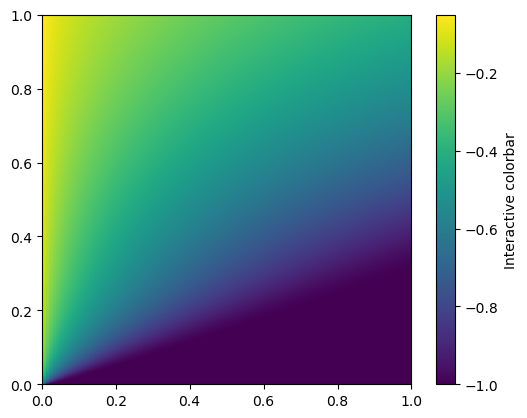

In [5]:

ul=-1.;ur=-1.

U0  = lambda x: ul*(x<0.5) + ur*(x>=0.5)
f  = lambda u: u**3
f_p= lambda u: 3* u**2

J,T = 100,2

Fv = Finite_Volume(U0,function=f,derivee_de_la_function=f_p,flux_methode="Godunov",film_bool=True, condition_limite="Dirichlet")

U = Fv.sol(J,T)

fig, ax = plt.subplots()
im = ax.imshow(U,extent=((0,1,0,1)))
fig.colorbar(im, ax=ax, label='Interactive colorbar')
plt.show()